In [3]:
#bring in libraries, packages, and csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
churn = pd.read_csv('/Users/wyatt/Downloads/gkridh34kd85jf94dcj2/churn_clean.csv')

In [4]:
#check for duplicates
churn.duplicated(subset = None)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
#check for null values
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
#check 'InternetService' for null values
churn["InternetService"].value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [7]:
#change 'None' to 'No Service' so it is recognized(Zach)
churn[['InternetService']] = churn[['InternetService']].fillna('No Service')

In [8]:
#check 'InternetService' for null values
churn["InternetService"].value_counts()
#all fixed

InternetService
Fiber Optic    4408
DSL            3463
No Service     2129
Name: count, dtype: int64

In [9]:
#check out mean values
churn.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [10]:
SS = StandardScaler()
#scale data set (Kamara, “Constructing and Fitting KMeans on Dataset”)
churnscale1 = SS.fit_transform(churn[['Outage_sec_perweek', 'Tenure']])

In [11]:
#make dataframe (Kamara, “Constructing and Fitting KMeans on Dataset”)
churnscale1_df = pd.DataFrame(churnscale1, columns = ['Outage_sec_perweek', 'Tenure'])
churnscale1_df.describe().round(2)

,Outage_sec_perweek,Tenure
count,10000.00,10000.00
mean,0.00,0.00
std,1.00,1.00
min,-3.33,-1.27
25%,-0.67,-1.01
50%,0.01,0.03
75%,0.66,1.02
max,3.77,1.42


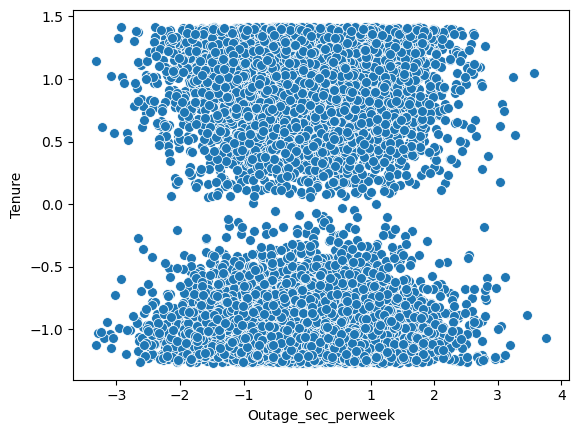

In [12]:
#basic scatterplot evaluation (Kamara, “Constructing and Fitting KMeans on Dataset”)
scatterscale = sns.scatterplot(data = churnscale1_df, x = 'Outage_sec_perweek', y = 'Tenure', s = 50)

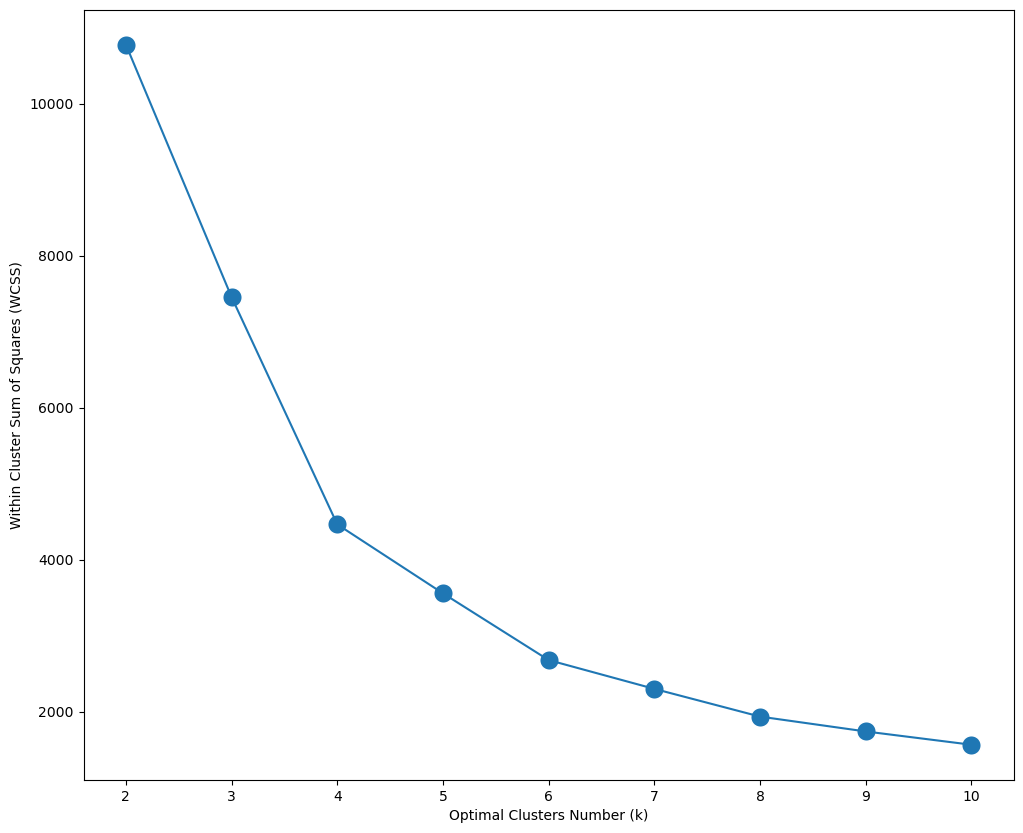

In [13]:
#find optimal k-value (Kamara, “Evaluate KMeans Model”)
wcss = []
for k in range (2, 11):
    model = kmeans(n_clusters = k, n_init = 50, random_state = 42)
    model.fit(churnscale1_df)
    wcss.append(model.inertia_)
wcss_s = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(12, 10))
ax = sns.lineplot(y = wcss_s, x = wcss_s.index)
ax = sns.scatterplot(y = wcss_s, x = wcss_s.index, s = 200)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)', 
           ylabel = 'Within Cluster Sum of Squares (WCSS)')

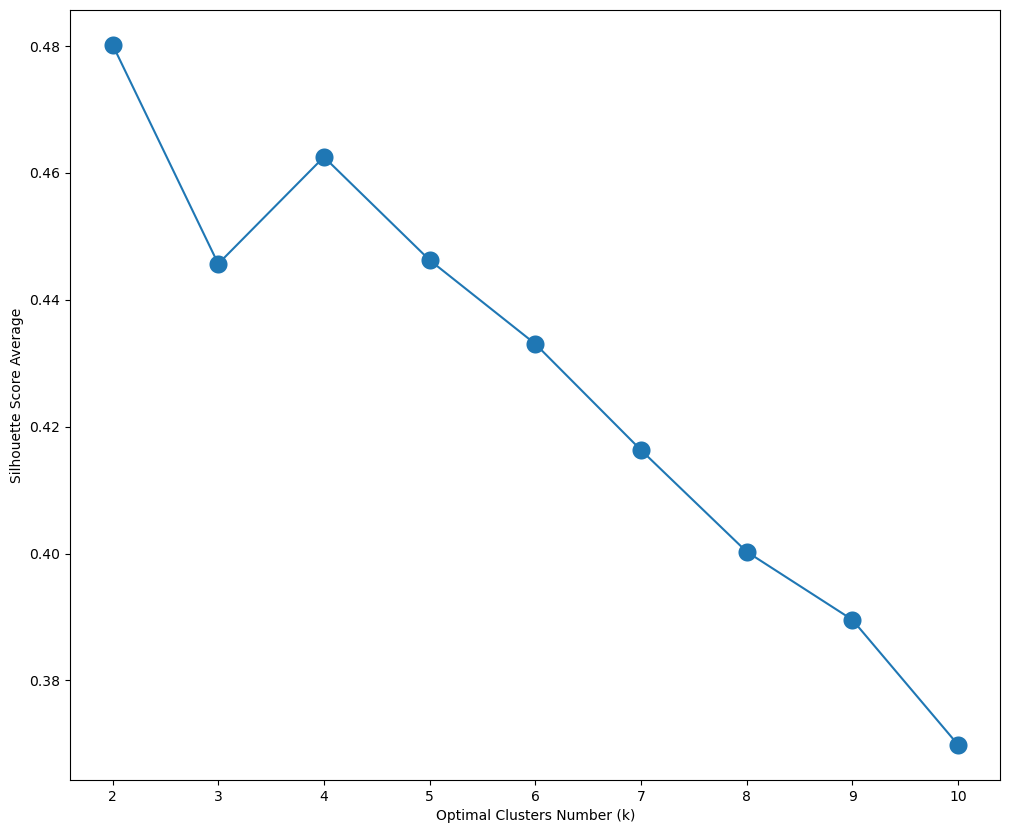

In [14]:
#silhouette score (Kamara, “Evaluate KMeans Model”)
silhouette = []
for k in range (2, 11):
    model = kmeans(n_clusters = k, n_init = 25, random_state = 300)
    model.fit(churnscale1_df)
    silhouette.append(silhouette_score(churnscale1_df, model.labels_))
silhouette_s = pd.Series(silhouette, index = range(2, 11))
plt.figure(figsize = (12, 10))
ax = sns.lineplot(y = silhouette_s, x = silhouette_s.index)
ax = sns.scatterplot(y = silhouette_s, x = silhouette_s.index, s =200)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)',
           ylabel = 'Silhouette Score Average')

In [15]:
#initialize kmeans (Kamara, “Constructing and Fitting KMeans on Dataset”)
modelk = kmeans(n_clusters = 4, n_init = 25, random_state = 42)
modelk.fit(churnscale1_df)

KMeans(n_clusters=4, n_init=25, random_state=42)

In [16]:
#evaluate centroids (Kamara, “Analyze and Interpret KMeans”)
centroid = pd.DataFrame(modelk.cluster_centers_, 
                        columns = ['Outage_sec_perweek', 'Tenure'])
centroid

,Outage_sec_perweek,Tenure
0,-0.803617,-0.965167
1,-0.792142,0.959317
2,0.801091,0.961373
3,0.780738,-0.956384


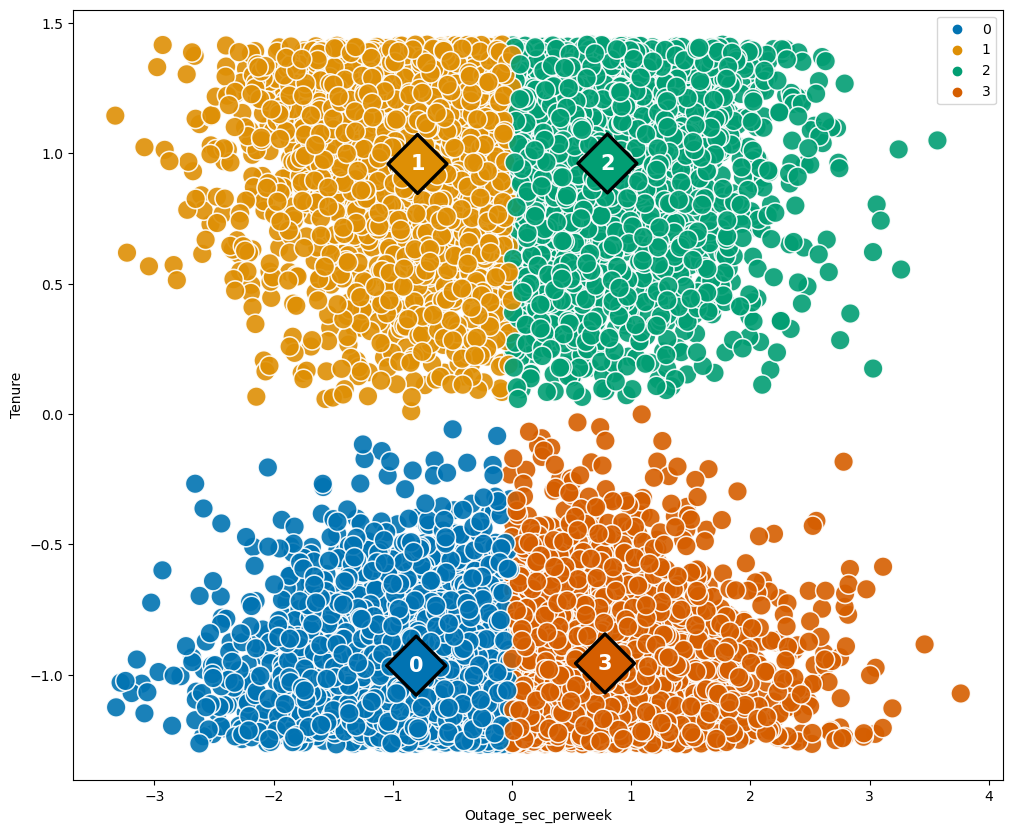

In [17]:
#graph centroids (Kamara, “Analyze and Interpret KMeans”)
plt.figure(figsize = (12, 10))
ax = sns.scatterplot(data = churnscale1_df,
                    x = 'Outage_sec_perweek',
                    y = 'Tenure', 
                    hue = modelk.labels_,
                    palette = 'colorblind',
                    alpha = 0.9,
                    s = 200,
                    legend = True)
ax = sns.scatterplot(data = centroid,
                    x = 'Outage_sec_perweek',
                    y = 'Tenure',
                    hue = centroid.index,
                    palette = 'colorblind',
                    s = 900,
                    marker = 'D',
                    ec = 'black',
                    legend = False)
for i in range(len(centroid)):
    plt.text(x = centroid.Outage_sec_perweek[i],
            y = centroid.Tenure[i],
            s = i,
            horizontalalignment='center',
            verticalalignment='center',
            size = 15,
            weight = 'bold',
            color = 'white')


In [20]:
#generate clean csvs
churn.to_csv("/Users/wyatt/Downloads/churn_cleanD212PA1.csv")

In [21]:
churnscale1_df.to_csv("/Users/wyatt/Downloads/churnscale1_df.csv")